In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-90.000, high=90.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-82.4583657371268 46.59975140998236
-3.601398054273588 -0.5296916769219848
1.2312416415089729 19.442376038121367
8.884117032834197 20.77558232546454
35.905815329038006 -30.848560946214114
-83.4362899377665 -21.366168835665547
18.48324275042188 89.6839572773751
50.77651866117222 -36.486006959924055
-57.66602092824086 -21.88235429724365
31.098360752804098 -70.10518286703524
-5.662870058087194 69.72971822174392
-44.17695149572345 17.87641677949908
-25.469813861935165 -22.739749297986663
12.361408942054538 -8.165599310910537
44.757939194206784 -61.60771023776353
-42.95844781429845 -7.298167791935342
62.52863970670816 75.37173384303125
54.94456298415486 -75.59470197363235
-53.17010637733639 79.8079074699113
74.12136507313389 68.76843293654201
-53.64737986432495 -85.18923330302518
35.57759727100529 -68.99171645751035
66.3994699424656 35.92378632565685
-35.07110998145916 64.51718499387073
-67.54383297758855 23.867811233884836
74.02744477185601 83.83266273301984
8.668421173856046 68.7995155349

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

port alfred za
takoradi gh
impfondo cg
ndele cf
ribeira grande pt
ushuaia ar
teknaf bd
nanortalik gl
cidreira br
hamilton bm
hithadhoo mv
hermanus za
caravelas br
bamako ml
port hawkesbury ca
jamestown sh
noyabrsk ru
chapais ca
mahebourg mu
yar-sale ru
punta arenas cl
hamilton bm
solovetskiy ru
souillac mu
bredasdorp za
dikson ru
kavaratti in
ribeira grande pt
jamestown sh
sinkat sd
moroni km
taolanaro mg
mar del plata ar
puerto del rosario es
hualmay pe
benton harbor us
jamestown sh
loiza us
pereira barreto br
stroud gb
jamestown sh
porbandar in
hermanus za
nouadhibou mr
sisimiut gl
westport ie
illoqqortoormiut gl
ushuaia ar
tasiilaq gl
saint-philippe re
mouzakion gr
codrington ag
fougamou ga
pinega ru
namwala zm
ribeira grande pt
hithadhoo mv
dudinka ru
barentsburg sj
taolanaro mg
cape town za
villazon bo
cape town za
tarko-sale ru
ushuaia ar
urumqi cn
prilep mk
jiwani pk
arraial do cabo br
port alfred za
gat ly
cape town za
kuche cn
bereda so
saint anthony ca
ushuaia ar
belushya gub

In [7]:
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

597

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 85.86,
  'feels_like': 88.84,
  'temp_min': 79.95,
  'temp_max': 93.83,
  'pressure': 1014,
  'humidity': 54},
 'visibility': 10000,
 'wind': {'speed': 14.97, 'deg': 110},
 'clouds': {'all': 75},
 'dt': 1658085770,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1658049737,
  'sunset': 1658103485},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [12]:
# Get the JSON data.
boston_data = city_weather.json()

In [13]:
boston_data['sys']

{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1658049737,
 'sunset': 1658103485}

In [14]:
boston_data['sys']["country"]

'US'

In [15]:
boston_data["dt"]

1658085770

In [16]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 93.83 54 75 14.97


In [17]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2022, 7, 17, 19, 22, 50)

In [18]:
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-07-17 19:22:50'

In [19]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [20]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | takoradi
Processing Record 3 of Set 1 | impfondo
Processing Record 4 of Set 1 | ndele
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | teknaf
Processing Record 8 of Set 1 | nanortalik
Processing Record 9 of Set 1 | cidreira
Processing Record 10 of Set 1 | hamilton
Processing Record 11 of Set 1 | hithadhoo
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | caravelas
Processing Record 14 of Set 1 | bamako
Processing Record 15 of Set 1 | port hawkesbury
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | noyabrsk
Processing Record 18 of Set 1 | chapais
Processing Record 19 of Set 1 | mahebourg
Processing Record 20 of Set 1 | yar-sale
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | solovetskiy
City not found. Skipping...

In [21]:
len(city_data)

550

In [22]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,71.78,34,0,12.53,ZA,2022-07-17 19:22:06
1,Takoradi,4.8845,-1.7554,74.95,81,32,10.65,GH,2022-07-17 19:25:05
2,Impfondo,1.6381,18.0667,72.66,96,100,3.91,CG,2022-07-17 19:25:05
3,Ndele,8.4109,20.6473,69.48,98,100,2.59,CF,2022-07-17 19:25:06
4,Ribeira Grande,38.5167,-28.7000,75.60,78,20,18.41,PT,2022-07-17 19:25:06
5,Ushuaia,-54.8000,-68.3000,38.86,56,40,4.61,AR,2022-07-17 19:25:06
6,Teknaf,20.8624,92.3058,80.73,88,100,10.02,BD,2022-07-17 19:25:07
7,Nanortalik,60.1432,-45.2371,43.65,82,100,13.24,GL,2022-07-17 19:25:07
8,Cidreira,-30.1811,-50.2056,56.43,64,67,12.48,BR,2022-07-17 19:25:07
9,Hamilton,39.1834,-84.5333,75.72,94,100,12.66,US,2022-07-17 19:21:08


In [23]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Alfred,ZA,2022-07-17 19:22:06,-33.5906,26.8910,71.78,34,0,12.53
1,Takoradi,GH,2022-07-17 19:25:05,4.8845,-1.7554,74.95,81,32,10.65
2,Impfondo,CG,2022-07-17 19:25:05,1.6381,18.0667,72.66,96,100,3.91
3,Ndele,CF,2022-07-17 19:25:06,8.4109,20.6473,69.48,98,100,2.59
4,Ribeira Grande,PT,2022-07-17 19:25:06,38.5167,-28.7000,75.60,78,20,18.41
5,Ushuaia,AR,2022-07-17 19:25:06,-54.8000,-68.3000,38.86,56,40,4.61
6,Teknaf,BD,2022-07-17 19:25:07,20.8624,92.3058,80.73,88,100,10.02
7,Nanortalik,GL,2022-07-17 19:25:07,60.1432,-45.2371,43.65,82,100,13.24
8,Cidreira,BR,2022-07-17 19:25:07,-30.1811,-50.2056,56.43,64,67,12.48
9,Hamilton,US,2022-07-17 19:21:08,39.1834,-84.5333,75.72,94,100,12.66


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

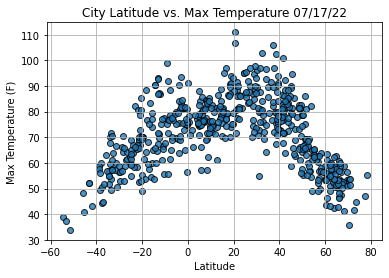

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

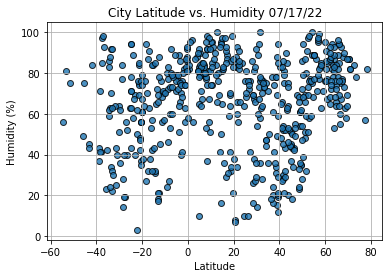

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

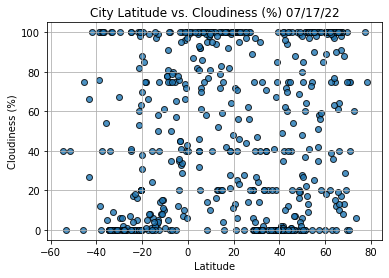

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

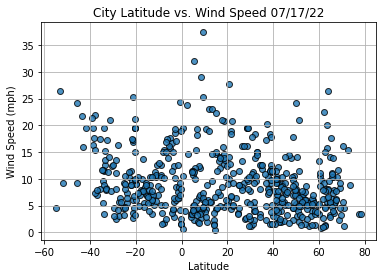

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()